In [65]:
#                              Implementation Of Simple Linear Regression (From Scratch)

In [40]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df=pd.read_csv('used datasets/placement_toy.csv') # toy dataset
print(df)
print(df.isnull().sum())

x = df.iloc[:, 0].values      # cgpa, 1D numpy array
y = df.iloc[:, 1].values      # package in LPA, 1D numpy array

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=42)

     cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]
cgpa       0
package    0
dtype: int64


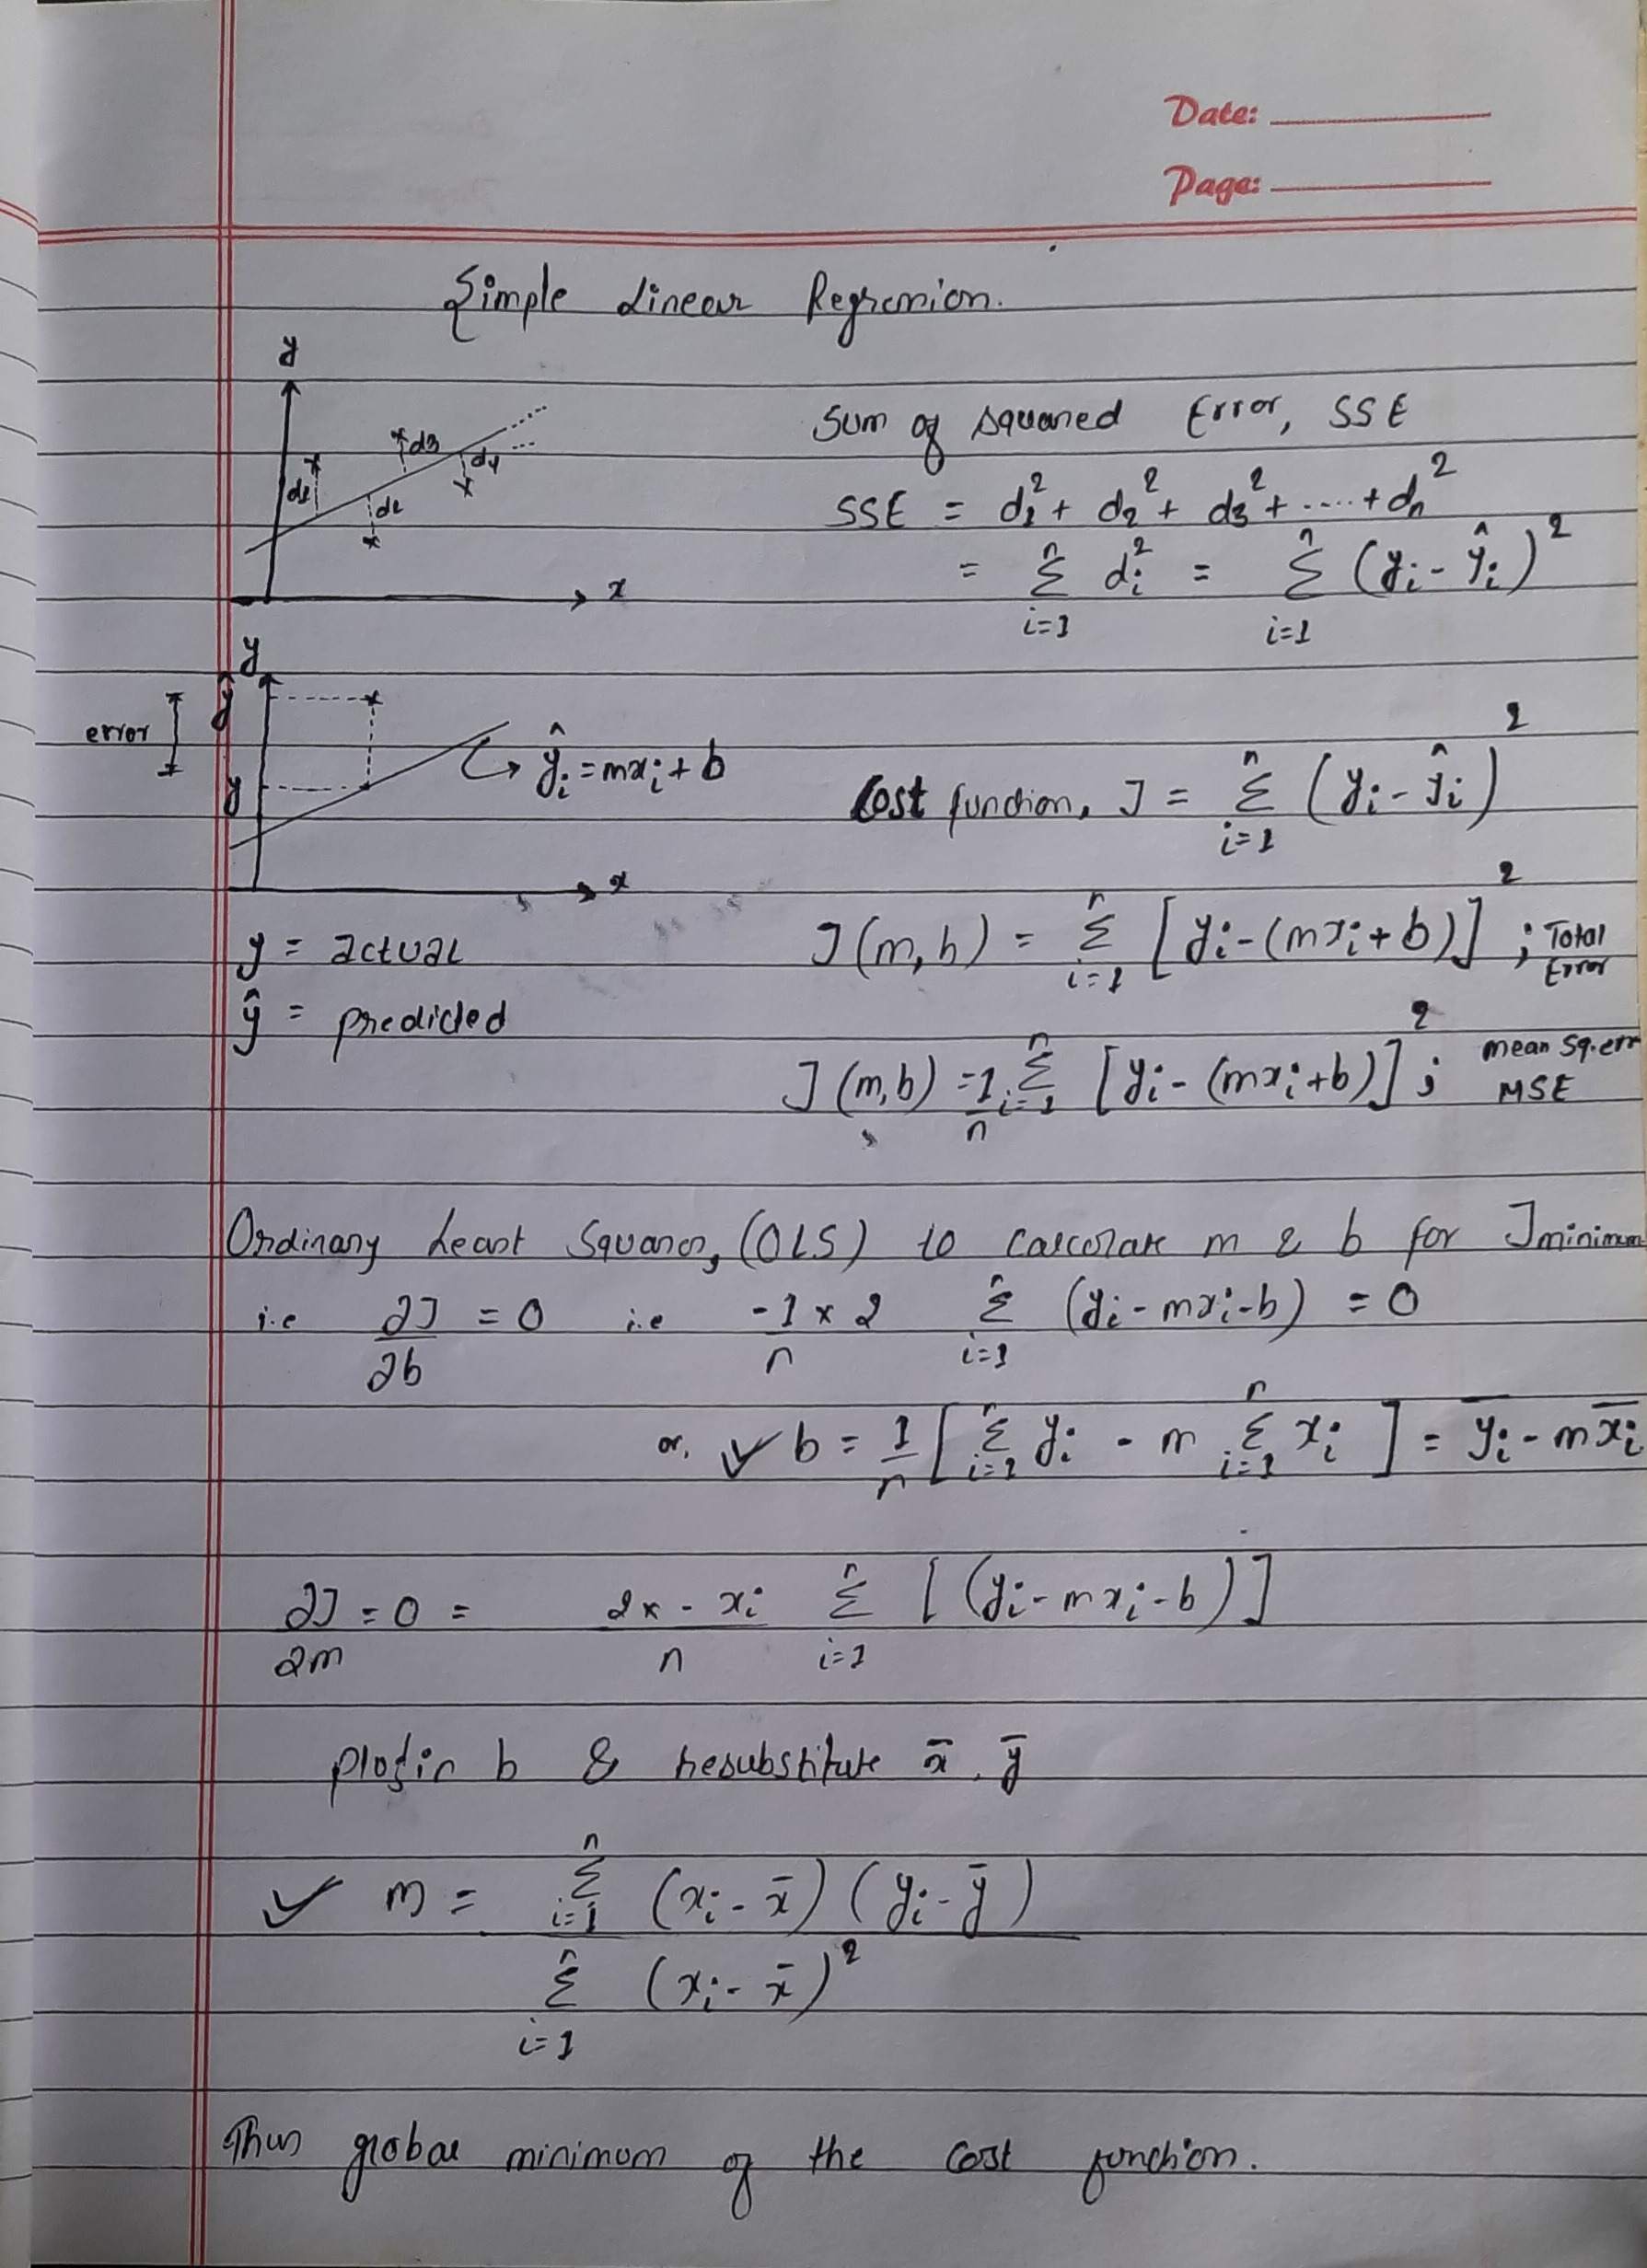

In [42]:
from IPython.display import Image
Image(filename='images/Derivation Of Simple Linear Regression.jpg')

In [43]:
#                                        Custom Class For Simple Linear Regression
class SimpleLinearRegression(object):
    def __init__ (self):
        self.slope_m = None
        self.intercept_b = None

    def train(self, X_train, y_train):
        """Model Training means calculating parameters [coefficients (m) and intercept(b)] of the model for best fit line through sort of linear data"""
        x_mean = X_train.mean()
        y_mean= y_train.mean()
        num = 0
        deno = 0
        for i in range (X_train.shape[0]):
            num = num + (X_train[i] - x_mean) * (y_train[i] - y_mean)
            deno = deno + (X_train[i] - x_mean) * (X_train[i] - x_mean)
        self.slope_m = num / deno
        self.intercept_b = y_mean - self.slope_m * x_mean
        
    def predict(self, cgpa):
        return self.slope_m * cgpa + self.intercept_b

In [44]:
slr_obj = SimpleLinearRegression()
slr_obj.train(X_train, y_train)
print(f'slope(m)= {slr_obj.slope_m}, intercept(b)= {slr_obj.intercept_b}')

slope(m)= 0.5742564727019197, intercept(b)= -1.0270069374542108


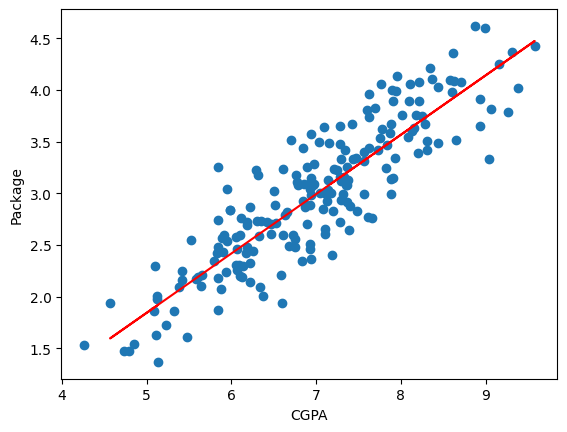

In [45]:
plt.scatter (df['cgpa'], df['package'])
plt.plot (X_train, slr_obj.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [54]:
#                       Implementing Simple Linear Regression using scikit-learn

In [56]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

X_train = X_train.reshape(-1, 1)
lr.fit(X_train, y_train) # LinearRegression model expects input feature to be 2D array or matrix but target variable to be 1D array

slope = lr.coef_
intercept = lr.intercept_
print('slope (m) =',slope, 'intercept(b)=',intercept)
# Same as above , Thus Scikit-learn internally implement OLS to calculate parameters of Regression 

slope (m) = [0.57425647] intercept(b)= -1.0270069374542108


In [61]:
y_pred = lr.predict(X_test.reshape(-1,1))

In [64]:
# Regression Metrics : to assess 'How well model fits data and predicts' . MSE, MAE, RMSE, R2 score and Adjusted R2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))                # in LPA
print('Mean squared Error :',mean_squared_error(y_test, y_pred))                  # not in LPA
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, y_pred)))     # in LPA
print('R2 score :',r2_score(y_test, y_pred))                                 # i.e lpa feature could explain 77% variance in output column (i.e package)

adj_r2 = 1- ( (1-r2) * (40-1) / (40-1-1) )
print('adjusted r2 score:',adj_r2)
# adjusted r2 score will be good with more feature . It increases with increase in appropriate input feature and vice versa .
# but r2_score tends to increasse with increase in input feature no matter its relevant or not 

Mean Absolute Error : 0.23150985393278373
Mean squared Error : 0.08417638361329656
Root mean squared error: 0.2901316659954521
R2 score : 0.7730984312051673
adjusted r2 score: 0.7671273372895138
